#### Here is the central spot for the projects datasets

Project 3. Human Variant Call

You are consulting for a genetic diagnostics company (while working remotely from your home in Tahoe). They’ve tasked you with developing a pipeline to analyze Next-Generation Sequencing (NGS) data from human somatic samples.

You have been provided with two FASTQ files, representing paired-end reads from a single individual.

To achieve full credit (100%) for this project, submit the following deliverables:

A DataFrame containing all identified variants.

A second DataFrame featuring the top 20% highest-quality variants. Hint: Extract the quality column, perform the relevant calculations, and determine a threshold.

A third DataFrame listing variants exclusively on chromosomes 1 through 9.

A simple plot illustrating some aspect of the data (we covered various plot types in class).

For all projects: Refer to the rubric above for additional details. Each project will require a written report that includes one or more figures generated from your pipeline analysis. You will use external software, such as BWA and BCFTOOLS, as well as Python libraries like Pandas and Matplotlib.

In your written report, be sure to provide a detailed description of your methods, including the software versions used. If you have any questions Please ask!

In [15]:
# #### Human Sample
# #### This dataset has a small error, the names for both read ends do not match, it was downloaded from NCBI and a fastq interleaved, which means that reads are all in a single file, so
# #### but I split in two files, which is the most common format, but didnt notice the read ends didn't match.  Please use the dataset below

# #DO NOT USE #!gdown 1-QHpki7f9MjNbMMQoMjojfKi8OJ9BwrQ
# #DO NOT USE #!gdown 1-M1ogw7lNcF92Uldl6I4rSu89q_24Y7Q

# ##Use this, since it is fairly late, the dataset is very small, 1/6 the original size, so it will runa all alot faster.

!gdown  1-19R0FnpDSljtWkNKCKiciDW8HESq03P
!gdown  10n-w54s2d32aAGJKrgKjm5d8EMVpy-45

# ### To make thinngs faster for the student, here is the indexed human genome, hg38.
# ### You have to donwload it and decompressed it, you will get both the fasta and the BWT'ed files. Note all have same prefix Human<.files>.
# ### Next semester we will cover how specialized computers are often used to solve this aligmnet problem faster.

!gdown 1-0aDSqXLDsrNCEGPRTO4ppqx-0HF-f8R


Downloading...
From (original): https://drive.google.com/uc?id=1-19R0FnpDSljtWkNKCKiciDW8HESq03P
From (redirected): https://drive.google.com/uc?id=1-19R0FnpDSljtWkNKCKiciDW8HESq03P&confirm=t&uuid=d17674b4-2731-47a7-8057-634e00689058
To: /content/HumanWGS.SUBSET.R2.fastq
100% 695M/695M [00:08<00:00, 83.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=10n-w54s2d32aAGJKrgKjm5d8EMVpy-45
From (redirected): https://drive.google.com/uc?id=10n-w54s2d32aAGJKrgKjm5d8EMVpy-45&confirm=t&uuid=6aebb4a8-ef28-4a0c-b9ec-cee5cf55cee8
To: /content/HumanWGS.SUBSET.R1.fastq
100% 695M/695M [00:05<00:00, 131MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-0aDSqXLDsrNCEGPRTO4ppqx-0HF-f8R
From (redirected): https://drive.google.com/uc?id=1-0aDSqXLDsrNCEGPRTO4ppqx-0HF-f8R&confirm=t&uuid=9b77b8fa-00b6-4a26-8b28-61793cc69193
To: /content/Human38.tar.gz
100% 4.35G/4.35G [01:07<00:00, 64.6MB/s]


UPLOAD THE FILES FROM LAPTOP

MOUNTING

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/KGI/GENE5120/PROJECT/Human38.tar.gz .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
^C


In [17]:
!head -20 HumanWGS.SUBSET.R1.fastq

@SRR588495.1 1 length=101
CCCTAACCCTACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTACCCTAACCCTAACCCTACCCCTAACCC
+SRR588495.1 1 length=101
?????????????????????????????????????????????????????????????????????????????????????????????????????
@SRR588495.2 2 length=101
AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCT
+SRR588495.2 2 length=101
?????????????????????????????????????????????????????????????????????????????????????????????????????
@SRR588495.3 3 length=101
ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTCACCCTCACCCTCACCCTAACCCTCACCCTCACCCTCACCCTCACCCTCACCCTCACCC
+SRR588495.3 3 length=101
?????????????????????????????????????????????????????????????????????????????????????????????????????
@SRR588495.4 4 length=101
AGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTGAGGGTTCGGGTTAGGGTTAGGGTTAGGGTTAGGGTTCGGGTTAGGGG
+SRR588495.4 4 length=101
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [18]:
!head -20 HumanWGS.SUBSET.R2.fastq

/bin/bash: line 1: -20: command not found


In [19]:
#Unzipping the Human Genome Version 38
!gzip -df Human38.tar.gz
#Unzipping the file


gzip: Human38.tar.gz: unexpected end of file


In [20]:
!tar -xf Human38.tar

tar: Human38.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


THESE ARE ALL THE STEPS FROM BLAST LAB

In [28]:
!apt install bwa
!apt install samtools
!apt install bcftools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bwa is already the newest version (0.7.17-6).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
samtools is already the newest version (1.13-4).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bcftools is already the newest version (1.13-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [29]:
!wc -l HumanWGS.SUBSET.R1.fastq

10000000 HumanWGS.SUBSET.R1.fastq


In [30]:
!wc -l HumanWGS.SUBSET.R2.fastq

10000000 HumanWGS.SUBSET.R2.fastq


In [31]:
!bwa index -p Human Human38/Human.fasta

[bwa_index] Pack FASTA... 37.87 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=6176572802, availableWord=446606192
[BWTIncConstructFromPacked] 10 iterations done. 99999986 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999986 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999986 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 399999986 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 499999986 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 599999986 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 699999986 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 799999986 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 899999986 characters processed.
[BWTIncConstructFromPacked] 100 iterations done. 999999986 characters processed.
[BWTIncConstructFromPacked] 110 iterations done. 

In [32]:
# #### Option Number 2 bwa aln
!bwa aln Human HumanWGS.SUBSET.R1.fastq > HumanWGS.R1.sai
!bwa aln Human HumanWGS.SUBSET.R2.fastq > HumanWGS.R2.sai
!bwa sampe Human HumanWGS.R1.sai HumanWGS.R2.sai HumanWGS.SUBSET.R1.fastq HumanWGS.SUBSET.R2.fastq > Humanbwa.bam

[bwa_aln] 17bp reads: max_diff = 2
[bwa_aln] 38bp reads: max_diff = 3
[bwa_aln] 64bp reads: max_diff = 4
[bwa_aln] 93bp reads: max_diff = 5
[bwa_aln] 124bp reads: max_diff = 6
[bwa_aln] 157bp reads: max_diff = 7
[bwa_aln] 190bp reads: max_diff = 8
[bwa_aln] 225bp reads: max_diff = 9
[bwa_aln_core] calculate SA coordinate... 226.89 sec
[bwa_aln_core] write to the disk... 0.07 sec
[bwa_aln_core] 262144 sequences have been processed.
[bwa_aln_core] calculate SA coordinate... 198.26 sec
[bwa_aln_core] write to the disk... 0.06 sec
[bwa_aln_core] 524288 sequences have been processed.
[bwa_aln_core] calculate SA coordinate... 208.27 sec
[bwa_aln_core] write to the disk... 0.06 sec
[bwa_aln_core] 786432 sequences have been processed.
[bwa_aln_core] calculate SA coordinate... 218.49 sec
[bwa_aln_core] write to the disk... 0.06 sec
[bwa_aln_core] 1048576 sequences have been processed.
[bwa_aln_core] calculate SA coordinate... 206.61 sec
[bwa_aln_core] write to the disk... 0.04 sec
[bwa_aln_core

In [34]:
!head -n 100 Humanbwa.bam

@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr2	LN:242193529
@SQ	SN:chr20	LN:64444167
@SQ	SN:chr21	LN:46709983
@SQ	SN:chr22	LN:50818468
@SQ	SN:chr3	LN:198295559
@SQ	SN:chr4	LN:190214555
@SQ	SN:chr5	LN:181538259
@SQ	SN:chr6	LN:170805979
@SQ	SN:chr7	LN:159345973
@SQ	SN:chr8	LN:145138636
@SQ	SN:chr9	LN:138394717
@SQ	SN:chrM	LN:16569
@SQ	SN:chrX	LN:156040895
@SQ	SN:chrY	LN:57227415
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa sampe Human HumanWGS.R1.sai HumanWGS.R2.sai HumanWGS.SUBSET.R1.fastq HumanWGS.SUBSET.R2.fastq
SRR588495.1	77	*	0	0	*	*	0	0	CCCTAACCCTACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTACCCTAACCCTAACCCTACCCCTAACCC	?????????????????????????????????????????????????????????????????????????????????????????????????????
SRR588

In [35]:
!samtools view -bS -q 12 Humanbwa.bam | samtools sort -o Humanbwa.bam.sorted
#THIS ALIGNS THE READS. We want to see a sam file that we can READ (-bS = output is a sam), -q is the quality of the alignments,
## The pipe (|) says that instead of printing the output out, input it into the next operator. Sort it into the output file SARS.bam.sorted

[bam_sort_core] merging from 1 files and 1 in-memory blocks...


In [42]:
#Now we are going to call variants. bcftools is the parameter we are using (like bcftools), running the paramater mpileup (reference genome)
## we usually don't need the --max-depth and until the |. But max-depth says that if it's more than 2000, just stop at 2000 (each base is covered 2000 times,
## a lot of pileup. Cap it at 2000 reads).

## So we are piling up the reads and capping it at 2000
#The pipe operator | tells is to then take the output and take it to the next step:
# bcftools is the parameter we are using, and we are passing multiallelic aller (if there are more than 2 alleles in pop), use a ploidy of 1
#And we and the variants site
#-mv -Oz tells us that we want a compressed file
#Bacteria and viruses may be ploidy 1
#-o says output it into this file for a VARIANTS CALL
!bcftools mpileup -f Human38/Human.fasta --max-depth 2000 Humanbwa.bam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 2 -mv -Oz -o Human.Variants.vcf.gz

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [43]:
!gzip -df Human.Variants.vcf.gz
#Unzipping the file

In [78]:
!head -100 Human.Variants.vcf
#For instance in the first example, the reference has a

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f Human38/Human.fasta --max-depth 2000 Humanbwa.bam.sorted
##reference=file://Human38/Human.fasta
##contig=<ID=chr1,length=248956422>
##contig=<ID=chr10,length=133797422>
##contig=<ID=chr11,length=135086622>
##contig=<ID=chr12,length=133275309>
##contig=<ID=chr13,length=114364328>
##contig=<ID=chr14,length=107043718>
##contig=<ID=chr15,length=101991189>
##contig=<ID=chr16,length=90338345>
##contig=<ID=chr17,length=83257441>
##contig=<ID=chr18,length=80373285>
##contig=<ID=chr19,length=58617616>
##contig=<ID=chr2,length=242193529>
##contig=<ID=chr20,length=64444167>
##contig=<ID=chr21,length=46709983>
##contig=<ID=chr22,length=50818468>
##contig=<ID=chr3,length=198295559>
##contig=<ID=chr4,length=190214555>
##contig=<ID=chr5,length=181538259>
##contig=<ID=chr6,length=170805979>
##contig=<ID=chr7,length=159345973>
##contig=<ID=chr8,length=145138636>
##

In [45]:
####### This is to get you guys excited about next class/(es)
!pip install cyvcf2
# !gzip -df Human.Variants.vcf.gz
vcf_path = 'Human.Variants.vcf'

## This is a new python library that is a high-performance Python library for reading and manipulating Variant Call Format (VCF) files.
#It is a Cython wrapper around the htslib C library, providing a fast and efficient way to access VCF data in Python.


In [46]:
import cyvcf2

# Create a VCF reader object
vcf_reader = cyvcf2.VCF(vcf_path)
#using the cyvcf2.VCF function on vcf_path

with open('humanvariants.tsv', 'w') as file:
# Loop through each variant in the VCF file
    for variant in vcf_reader:
    # Access various properties of the variant
    ### Se note below
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        #For every row/variant, make the genotype and data_string
        # Write the data string to the file
        file.write(data_string)

#Here, we are making a text file called output.tsv

In [51]:
import pandas
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
df1 = pandas.read_csv("humanvariants.tsv", delimiter = "\t", header=None, names=columns)

DATA FRAME 1 WITH ALL OF THE VARIANTS

In [52]:
df1

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr1,54716,NaN,C,T,3.224510,NaN,3
1,chr1,54809,NaN,T,C,3.224510,NaN,3
2,chr1,54812,NaN,T,C,3.224510,NaN,3
3,chr1,56279,NaN,T,C,3.224510,NaN,3
4,chr1,57049,NaN,T,A,3.224510,NaN,3
...,...,...,...,...,...,...,...,...
916404,chrY,56882959,NaN,T,C,3.224510,NaN,3
916405,chrY,56882990,NaN,G,C,3.224510,NaN,3
916406,chrY,56885560,NaN,A,T,3.224510,NaN,3
916407,chrY,56885633,NaN,taaaaaaaaaa,tAAaaaaaaaaaa,26.429501,NaN,3


In [77]:
df1['GENOTYPE'].value_counts()

,count
GENOTYPE,
3,913642
1,2767


DATA FRAME 2 featuring the top 20% highest-quality variants



In [58]:
sorted_by_qual = df1.sort_values(by='QUAL', ascending=False)
df2 = sorted_by_qual.head(int(0.2*len(sorted_by_qual)))
df2

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
504546,chr21,7926421,NaN,T,C,228.423004,NaN,3
321710,chr16,46394940,NaN,G,T,228.421005,NaN,3
321705,chr16,46394582,NaN,G,C,228.419006,NaN,3
321650,chr16,46390591,NaN,A,T,228.399994,NaN,3
561089,chr3,93470446,NaN,G,A,228.399994,NaN,3
...,...,...,...,...,...,...,...,...
485110,chr20,9881041,NaN,T,A,3.224510,NaN,3
485111,chr20,9884026,NaN,A,C,3.224510,NaN,3
485112,chr20,9886999,NaN,C,A,3.224510,NaN,3
485113,chr20,9887001,NaN,C,A,3.224510,NaN,3


In [57]:
df1['QUAL'].max()

228.42300415039065

DATA FRAME 3: DISPLAYS VARIANTS FOR ONLY CHROMOSOMES 1 - 9

In [61]:
df3 = df1[df1['CHROM'].str.contains('^chr[1-9]{1}')]
df3

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr1,54716,NaN,C,T,3.22451,NaN,3
1,chr1,54809,NaN,T,C,3.22451,NaN,3
2,chr1,54812,NaN,T,C,3.22451,NaN,3
3,chr1,56279,NaN,T,C,3.22451,NaN,3
4,chr1,57049,NaN,T,A,3.22451,NaN,3
...,...,...,...,...,...,...,...,...
893052,chr9,138184114,NaN,C,T,3.22451,NaN,3
893053,chr9,138207231,NaN,C,T,3.22451,NaN,3
893054,chr9,138207259,NaN,C,A,3.22451,NaN,3
893055,chr9,138207285,NaN,C,G,3.22451,NaN,3


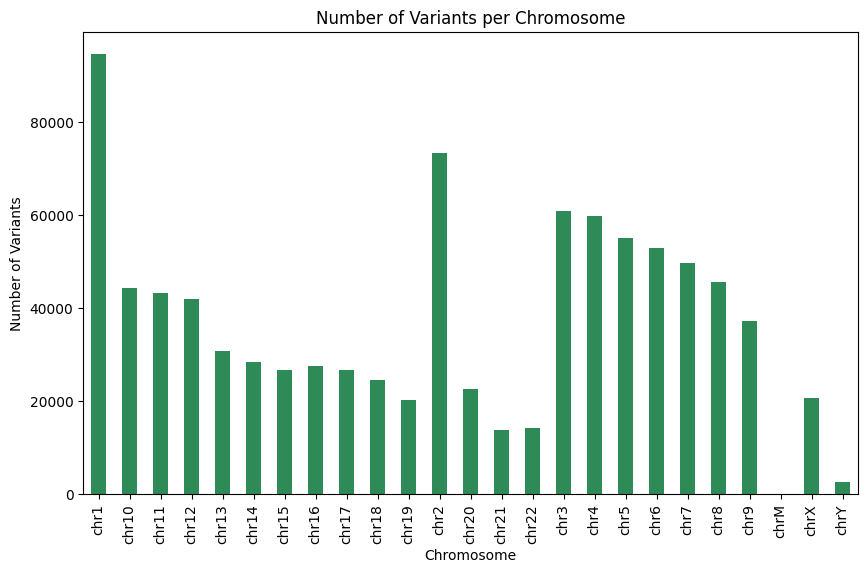

In [69]:
#Making a histogram of the number of variants per chromosomes
import matplotlib.pyplot as plt
grouped_by_chromosome = df1.groupby('CHROM').size()
grouped_by_chromosome.plot(kind='bar', color = 'seagreen', figsize=(10, 6))
plt.xlabel('Chromosome')
plt.ylabel('Number of Variants')
plt.title('Number of Variants per Chromosome')
plt.show()

In this plot, we can see that human chromosome 1 has the highest number of variants. This makes sense since Chromosome 1 is the largest chromosome, with more genes and non-coding regions than any other chromosome. This means that chromosome 1 will probably have the highest number of SNPs, compared to the other chromosomes.

In [73]:
#FINDING THE CHROMOSOME WITH THE LARGEST NUMBER OF VARIANTS
print(grouped_by_chromosome.sort_values(ascending= False).head(1))

CHROM
chr1    94640
dtype: int64


In [ ]:
#THIS IS THE CHROMOSOME WITH THE LOWEST NUMBER OF VARIANTS